# IMPORTING THE DATASET




**Experiment 1**

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rt_iot2022 = fetch_ucirepo(id=942)

# data (as pandas dataframes)
X = rt_iot2022.data.features
y = rt_iot2022.data.targets

# metadata
print(rt_iot2022.metadata)

# variable information
print(rt_iot2022.variables)

{'uci_id': 942, 'name': 'RT-IoT2022 ', 'repository_url': 'https://archive.ics.uci.edu/dataset/942/rt-iot2022', 'data_url': 'https://archive.ics.uci.edu/static/public/942/data.csv', 'abstract': 'The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios.\nIncorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can

**Loading the Dataset**

In [3]:
import pandas as pd
df = pd.concat([X, y], axis=1)
df

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,59247,63331,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123113,59247,64623,tcp,-,0.000007,1,1,0,0,144631.172400,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123114,59247,64680,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123115,59247,65000,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


**Experiment 2**

Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
df.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


In [6]:
df.tail()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
123112,59247,63331,tcp,-,0.000006,1,1,0,0,167772.1600,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123113,59247,64623,tcp,-,0.000007,1,1,0,0,144631.1724,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123114,59247,64680,tcp,-,0.000006,1,1,0,0,167772.1600,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123115,59247,65000,tcp,-,0.000006,1,1,0,0,167772.1600,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123116,59247,65129,tcp,-,0.000006,1,1,0,0,167772.1600,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


In [7]:
df.describe(include="all")

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
count,123117.000000,123117.000000,123117,123117,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000,123117
unique,NaN,NaN,3,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,NaN,tcp,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOS_SYN_Hping
freq,NaN,NaN,110427,102861,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94659
mean,34639.258738,1014.305092,NaN,NaN,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,...,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514,NaN
std,19070.620354,5256.371994,NaN,NaN,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,...,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843,NaN
min,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,NaN
25%,17702.000000,21.000000,NaN,NaN,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000,NaN
50%,37221.000000,21.000000,NaN,NaN,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000,NaN
75%,50971.000000,21.000000,NaN,NaN,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  i

<ipython-input-9-e84d7aad4ca0>:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


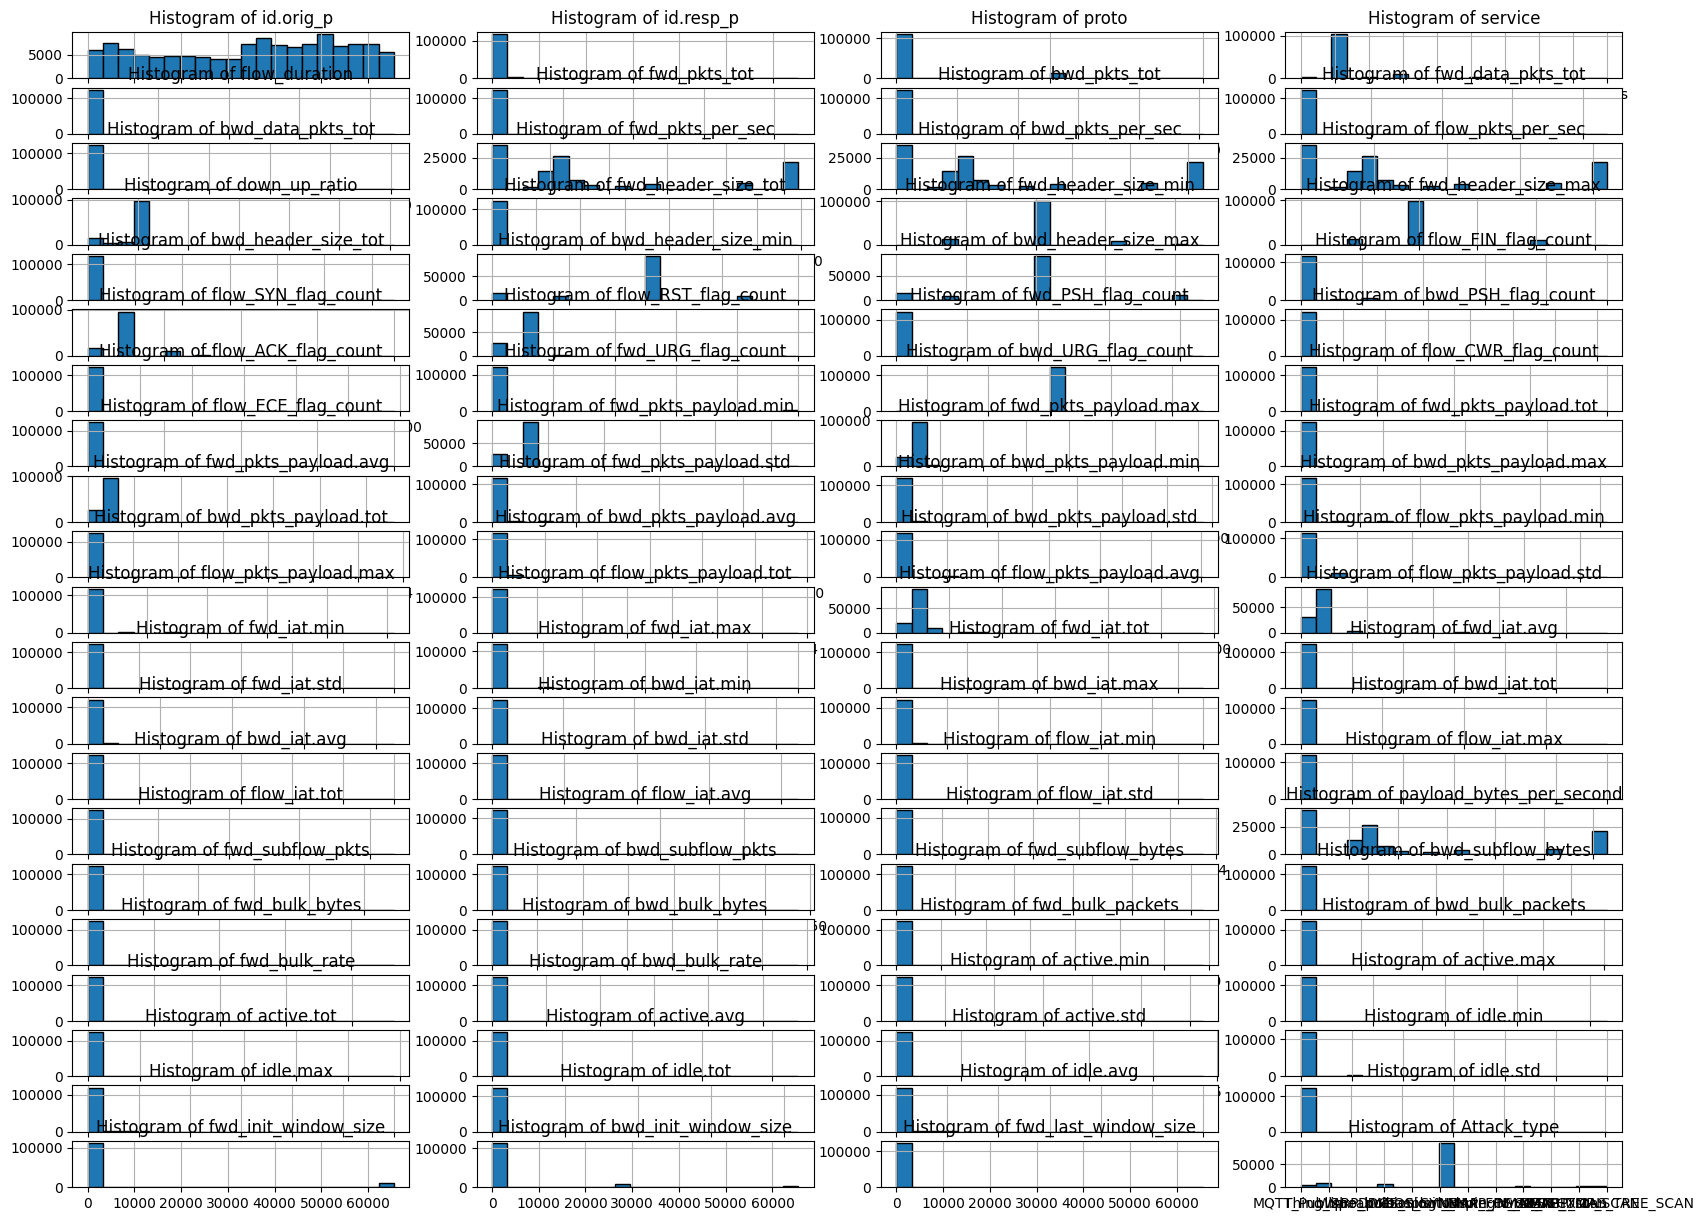

In [9]:
# List of all features
features = df.columns.tolist()

# Calculate the number of rows and columns needed for subplots
num_features = len(features)
num_cols = 4  # You can adjust this if needed
num_rows = int(np.ceil(num_features / num_cols))  # Calculate rows based on features and columns

# Plot histograms for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)  # Use calculated rows and columns
    df[feature].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

,0
id.orig_p,0
id.resp_p,0
proto,0
service,0
flow_duration,0
...,...
idle.std,0
fwd_init_window_size,0
bwd_init_window_size,0
fwd_last_window_size,0


ValueError: num must be an integer with 1 <= num <= 28, not 29

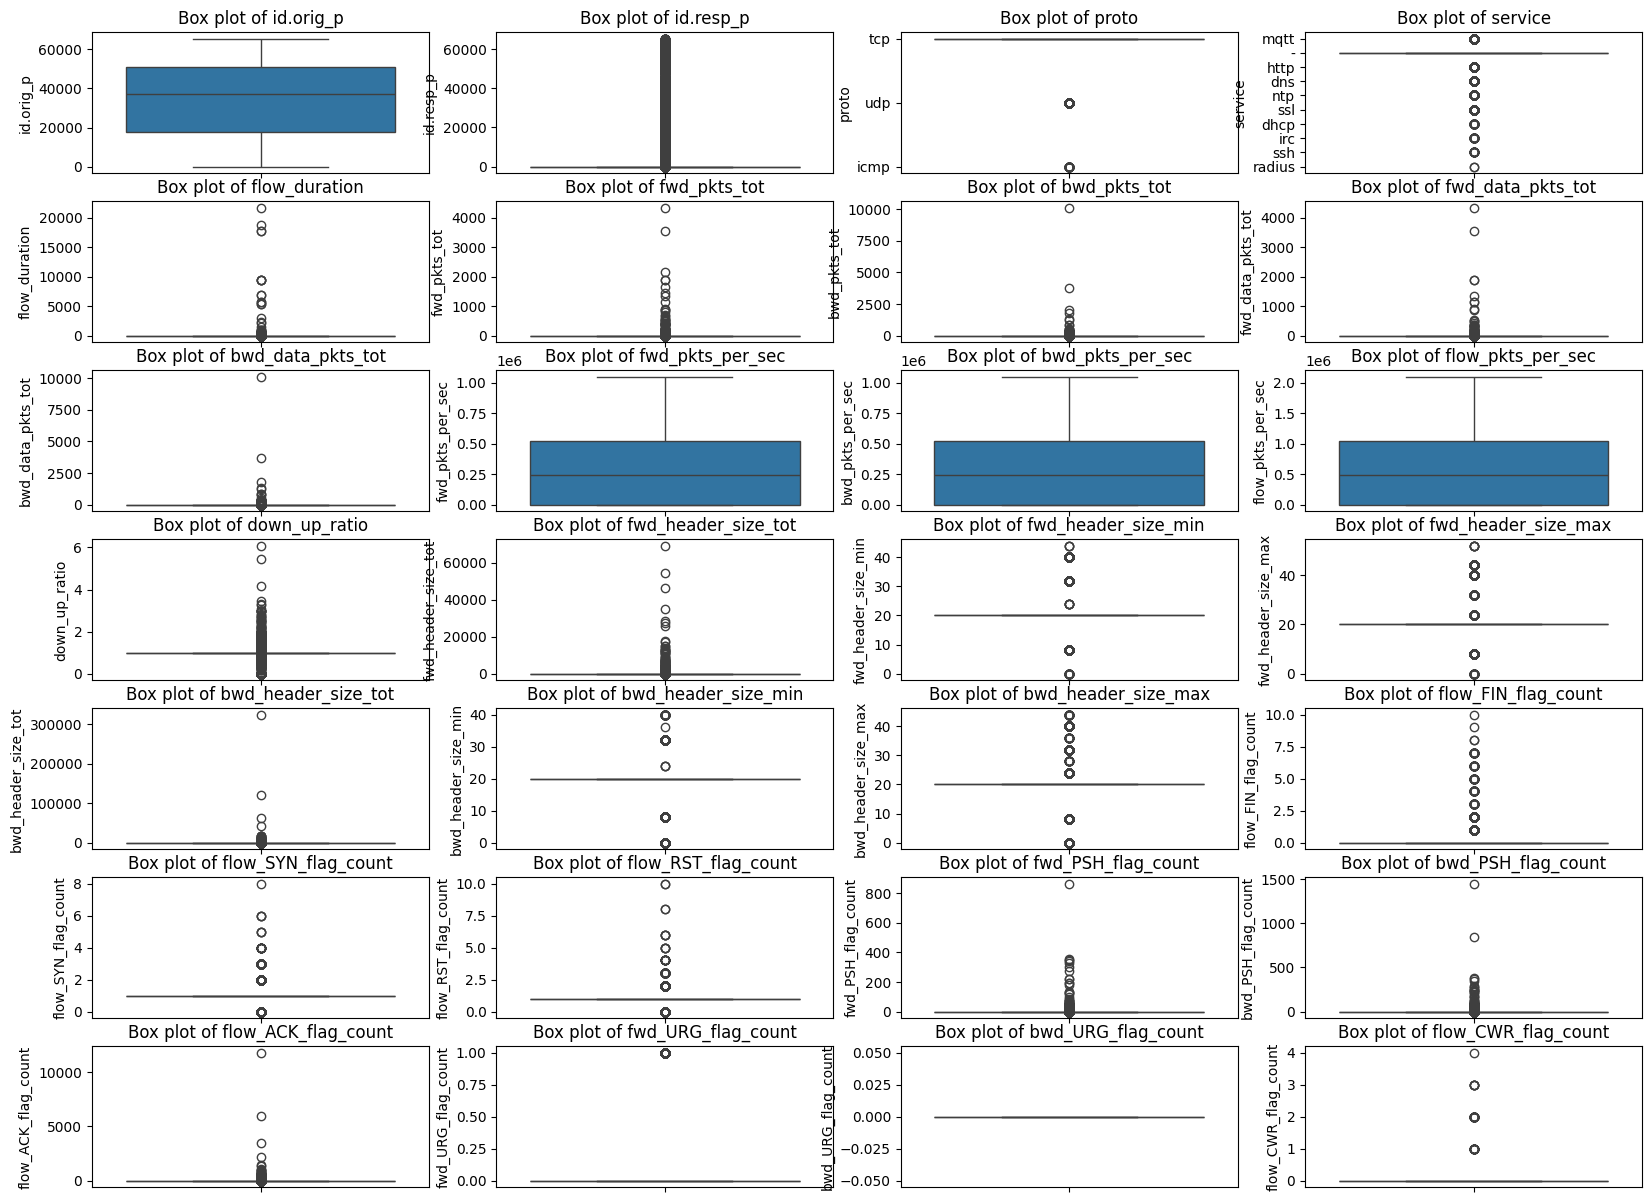

In [12]:
features = df.columns.tolist()
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(7, 4, i + 1)
    sns.boxplot(data=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()


In [13]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
20792,2841,21,tcp,-,0.000006,1,1,1,0,1.677722e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
20793,2842,21,tcp,-,0.000005,1,1,1,0,1.997288e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
20794,2843,21,tcp,-,0.000004,1,1,1,0,2.621440e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
20795,2844,21,tcp,-,0.000004,1,1,1,0,2.467238e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
20796,2845,21,tcp,-,0.000004,1,1,1,0,2.467238e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112263,3660,21,tcp,-,0.000001,1,1,1,0,1.048576e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
112264,3661,21,tcp,-,0.000002,1,1,1,0,5.242880e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
112265,3662,21,tcp,-,0.000001,1,1,1,0,1.048576e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
112266,3663,21,tcp,-,0.000002,1,1,1,0,4.660338e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping


ValueError: num must be an integer with 1 <= num <= 24, not 25

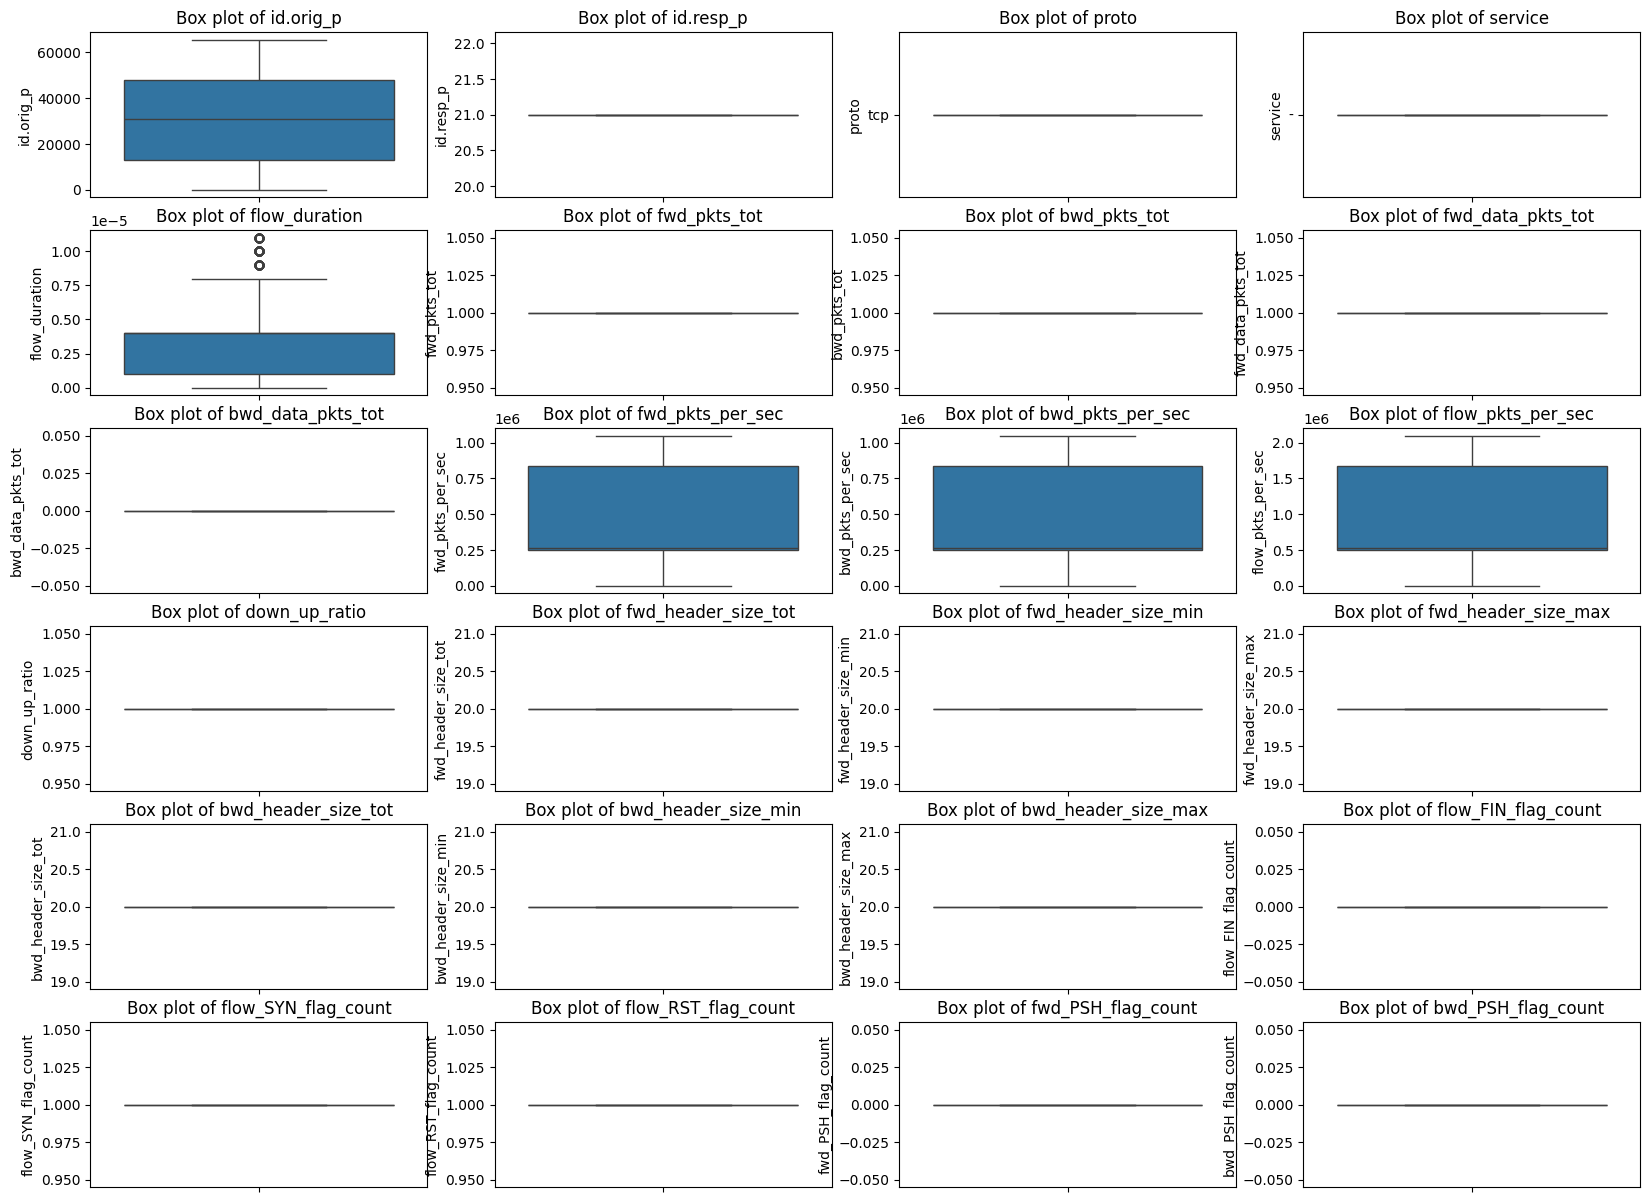

In [14]:
features = df.columns.tolist()
# Plot box plots for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

**Experiment 3**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [18]:
print(X)

[[2841 21 'tcp' ... 64 0 64]
 [2842 21 'tcp' ... 64 0 64]
 [2843 21 'tcp' ... 64 0 64]
 ...
 [3662 21 'tcp' ... 64 0 64]
 [3663 21 'tcp' ... 64 0 64]
 [3664 21 'tcp' ... 64 0 64]]


In [19]:
print(Y)

['DOS_SYN_Hping' 'DOS_SYN_Hping' 'DOS_SYN_Hping' ... 'DOS_SYN_Hping'
 'DOS_SYN_Hping' 'DOS_SYN_Hping']


In [20]:
from sklearn.impute import SimpleImputer
import numpy as np
try:
    X[:, 1:3] = X[:, 1:3].astype(float)
    si = SimpleImputer(missing_values=np.nan, strategy='mean')
except ValueError:
    si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

si.fit(X[:, 1:3])
X[:, 1:3] = si.transform(X[:, 1:3])

In [21]:
print(X)

[[2841 21 'tcp' ... 64 0 64]
 [2842 21 'tcp' ... 64 0 64]
 [2843 21 'tcp' ... 64 0 64]
 ...
 [3662 21 'tcp' ... 64 0 64]
 [3663 21 'tcp' ... 64 0 64]
 [3664 21 'tcp' ... 64 0 64]]


In [22]:
print(Y)

['DOS_SYN_Hping' 'DOS_SYN_Hping' 'DOS_SYN_Hping' ... 'DOS_SYN_Hping'
 'DOS_SYN_Hping' 'DOS_SYN_Hping']


In [15]:
##from sklearn.compose import ColumnTransformer
##from sklearn.preprocessing  import OneHotEncoder
##ct = ColumnTransformer([('encoder',OneHotEncoder(), [0])] , remainder = 'drop')
##X = np.array(ct.fit_transform(X).todense())

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)

[0 0 0 ... 0 0 0]


**Experiment 4**

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
import pandas as pd

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Alternatively, if the target column name is unknown
# get a list of available columns and identify the correct one
print(df.columns)

y = df['Target'] # Use the correct column name here as well

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

KeyError: 'Target'

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
df_train_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)
df_test_normalized = pd.DataFrame(X_test_normalized, columns=X.columns)
print(df_train_normalized.head())
print(df_test_normalized.head())

NameError: name 'X_train' is not defined

In [ ]:
##from sklearn.preprocessing import StandardScaler

##scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
df_train_scaled['target'] = y_train.reset_index(drop=True)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
df_test_scaled['target'] = y_test.reset_index(drop=True)

print(df_train_scaled.head())
print(df_test_scaled.head())

**Experiment 5**

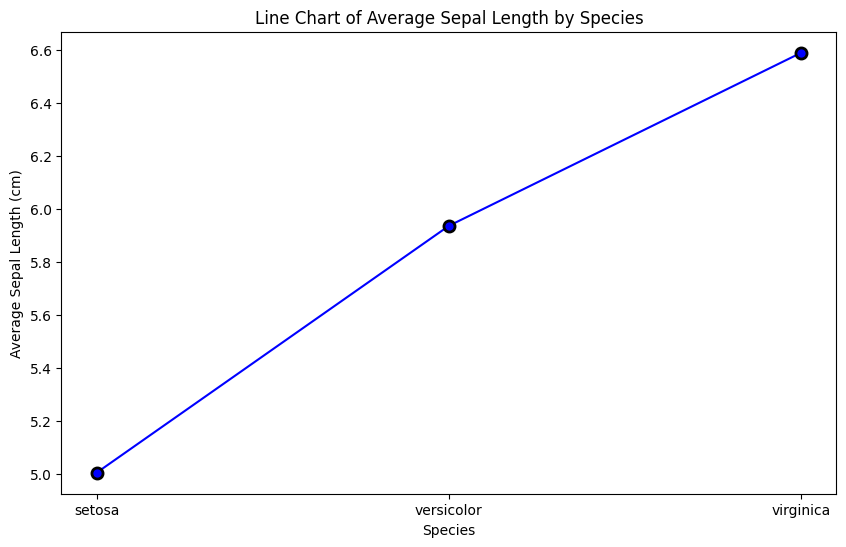

In [35]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({i: species for i, species in enumerate(iris.target_names)})
avg_sepal_length = df.groupby('species')['sepal length (cm)'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_sepal_length.index, avg_sepal_length.values, marker='o', linestyle='-', color='b', markersize=8, markeredgewidth=2, markeredgecolor='black')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.title('Line Chart of Average Sepal Length by Species')
plt.show()

<ipython-input-36-0043b0cf694a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='species', palette='Set2')


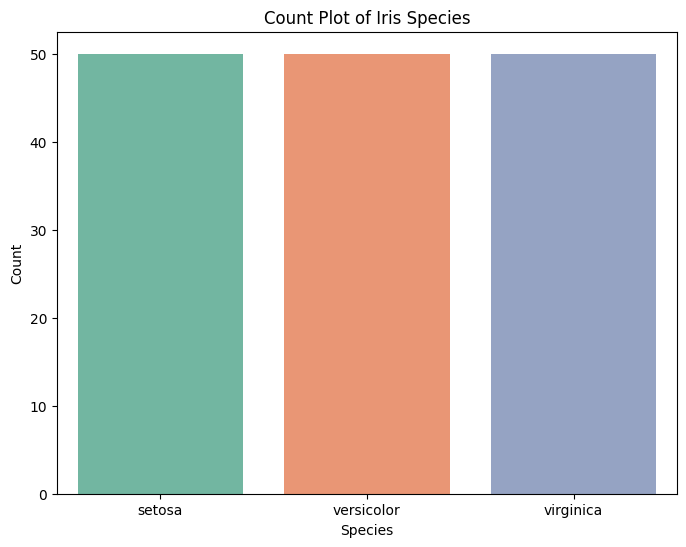

In [36]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='species', palette='Set2')

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count Plot of Iris Species')

# Display the plot
plt.show()

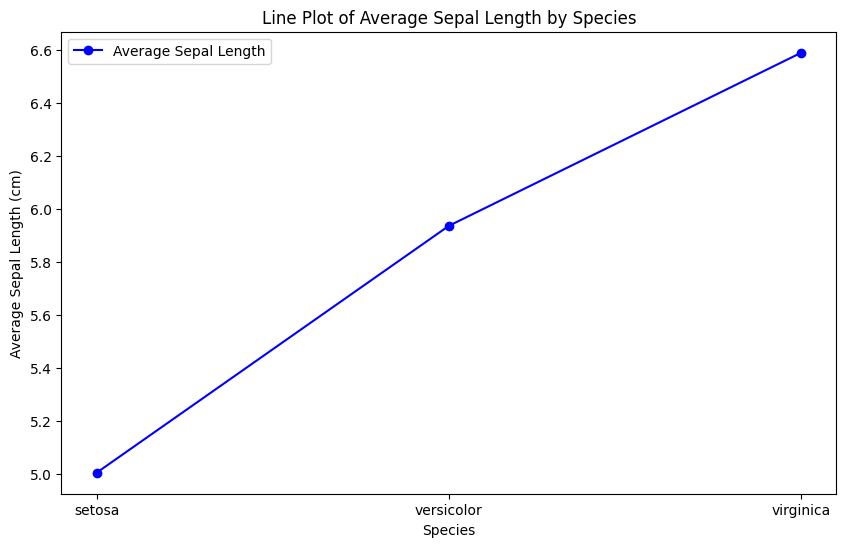

In [37]:
# Calculate the average sepal length for each species
avg_sepal_length = df.groupby('species')['sepal length (cm)'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_sepal_length.index, avg_sepal_length.values, marker='o', linestyle='-', color='b', label='Average Sepal Length')

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.title('Line Plot of Average Sepal Length by Species')

# Add legend
plt.legend(loc='best')

# Display the plot
plt.show()

**Experiment 6**

In [39]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({i: species for i, species in enumerate(iris.target_names)})

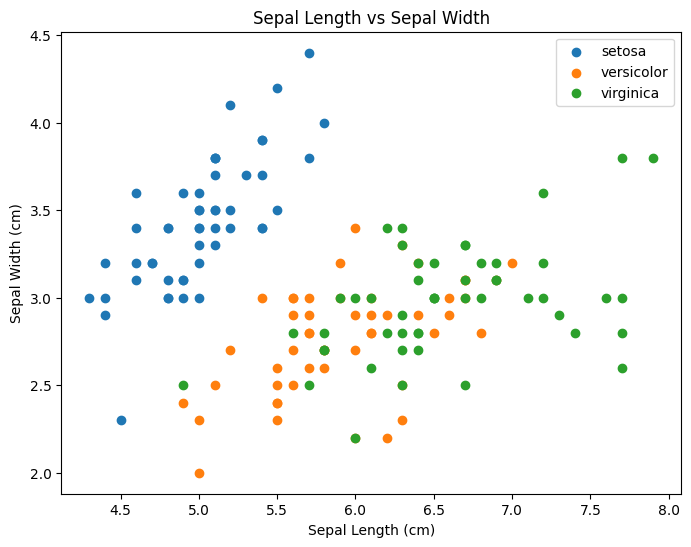

In [40]:
import matplotlib.pyplot as plt

# Scatter plot of Sepal Length vs Sepal Width
plt.figure(figsize=(8, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

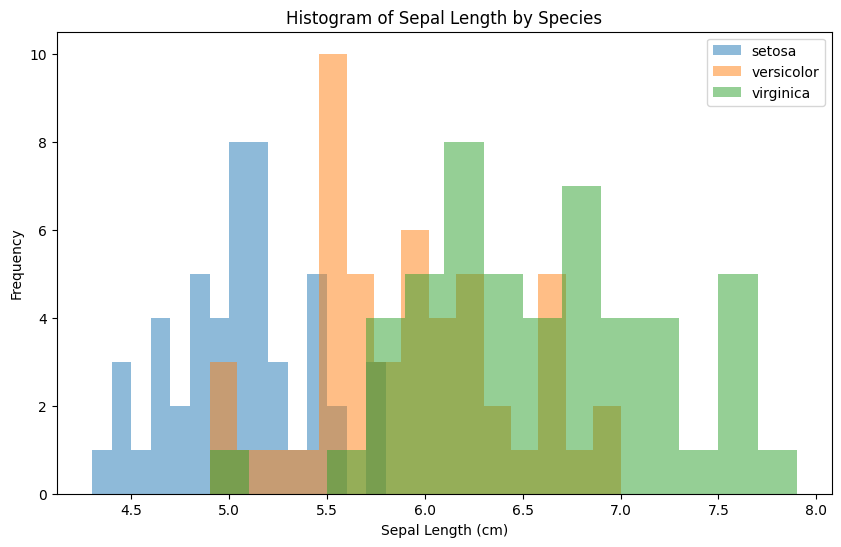

In [41]:
plt.figure(figsize=(10, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.hist(subset['sepal length (cm)'], bins=15, alpha=0.5, label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length by Species')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

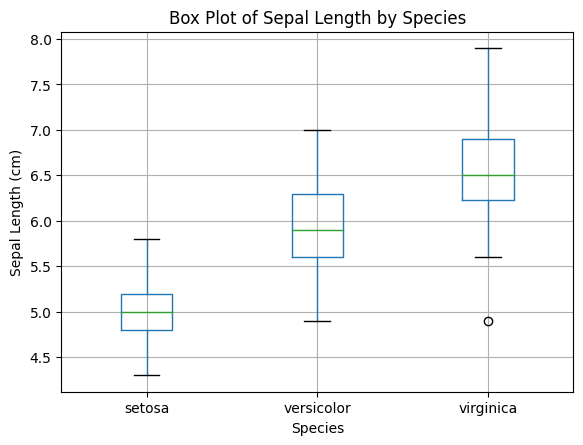

In [42]:
plt.figure(figsize=(10, 6))
df.boxplot(column='sepal length (cm)', by='species')

plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Box Plot of Sepal Length by Species')
plt.suptitle('')  # Suppress the default title to keep it clean
plt.show()

In [44]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({i: species for i, species in enumerate(iris.target_names)})

avg_sepal_length = df.groupby('species')['sepal length (cm)'].mean()

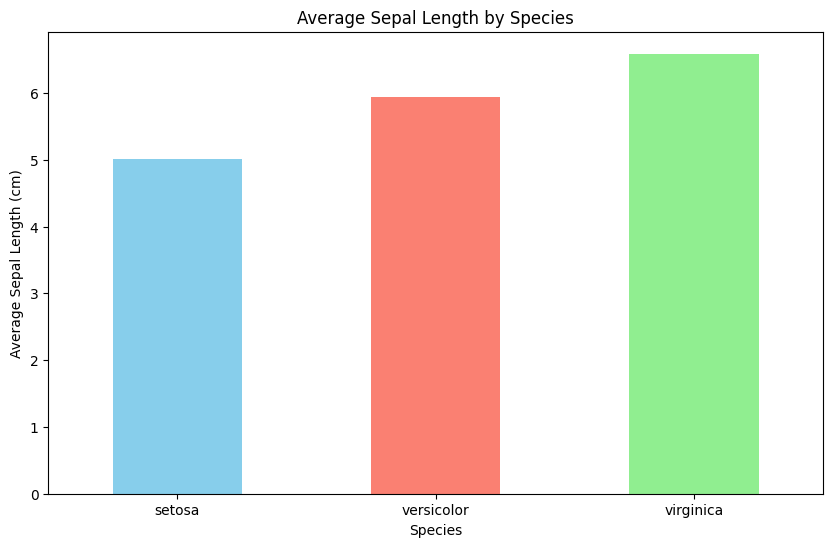

In [45]:
# Create a bar plot
plt.figure(figsize=(10, 6))
avg_sepal_length.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])

plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.title('Average Sepal Length by Species')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal

plt.show()

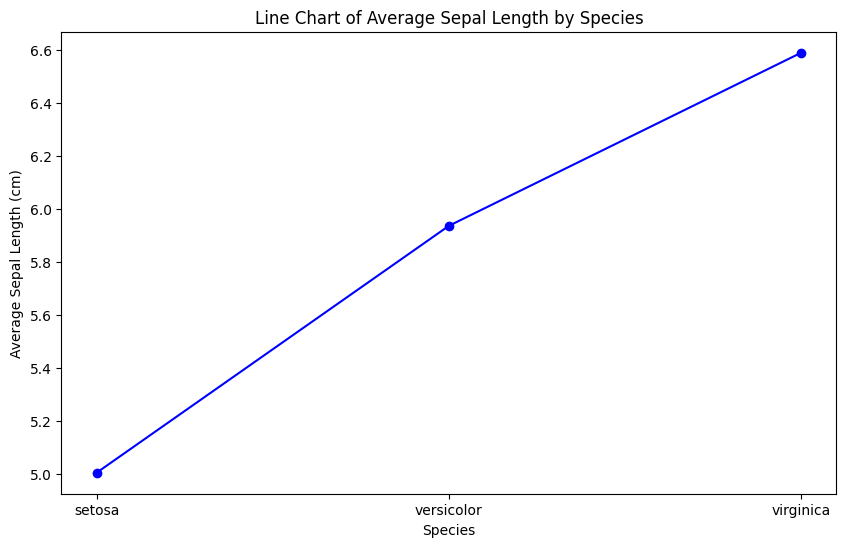

In [46]:
avg_sepal_length = df.groupby('species')['sepal length (cm)'].mean()
# Create a line chart
plt.figure(figsize=(10, 6))

# Plotting average sepal length for each species
plt.plot(avg_sepal_length.index, avg_sepal_length.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.title('Line Chart of Average Sepal Length by Species')

# Display the plot
plt.show()